In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Mining & Deep Learning/icml_face_data.csv')

In [ ]:
# function to convert pixel values in string format to array format
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

dataset[' pixels'] = dataset[' pixels'].apply(lambda x: string2array(x))

In [ ]:
label_to_text = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happiness', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

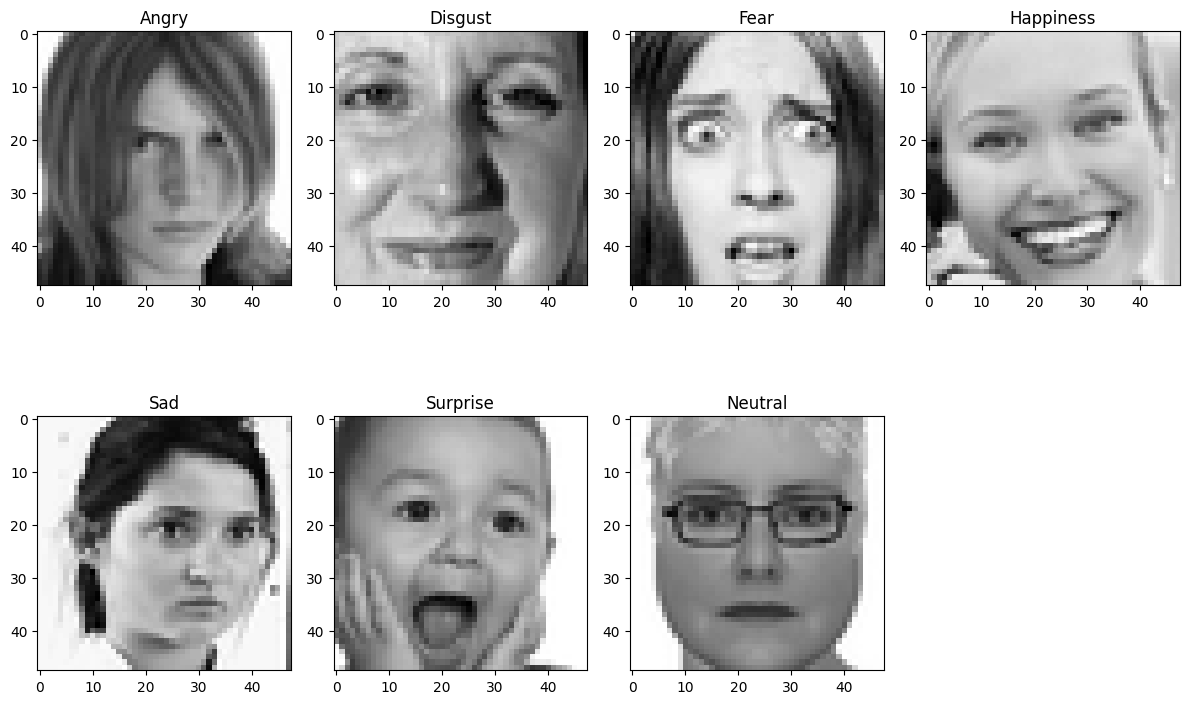

In [ ]:
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

emotions = [0, 1, 2, 3, 4, 5, 6]

#plot random image from each class
for i in emotions:
    data = dataset[dataset['emotion'] == i][16:17]
    img = data[' pixels'].item()
    img = img.reshape(48, 48)
    ax = axes[i]
    ax.set_title(label_to_text[i])
    ax.imshow(img, cmap='gray')

for i in range(len(emotions), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

In [ ]:
# Separate data based on 'Usage' column
train_data = dataset[dataset[' Usage'] == 'Training']
test_data = dataset[dataset[' Usage'] == 'PublicTest']
val_data = dataset[dataset[' Usage'] == 'PrivateTest']

#Training Data
X_train = train_data[' pixels']
y_train = to_categorical(train_data['emotion'])

#Testing Data
X_test = test_data[' pixels']
y_test = to_categorical(test_data['emotion'])

#Validation Data
X_val = val_data[' pixels']
y_val = to_categorical(val_data['emotion'])

print(dataset.shape)
print(X_train.shape, X_test.shape, X_val.shape)

(35887, 3)
(28709,) (3589,) (3589,)


In [ ]:
X_train = np.stack(X_train, axis = 0)
X_train = X_train.reshape(28709 , 2304)

X_test = np.stack(X_test, axis = 0)
X_test = X_test.reshape(3589 , 2304)

X_val = np.stack(X_val, axis = 0)
X_val = X_val.reshape(3589 , 2304)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

In [ ]:
x_newtrain = []
y_newtrain = []

x_newval = []
y_newval = []

x_newtest = []
y_newtest = []

unique_values_train = {'0': 0, '1': 0, '2':0, '3':0, '4':0, '5':0, '6':0}

for i in range(len(y_train)):
  for j in range(7):
    if (y_train[i])[j] == 1:
      value = unique_values_train.get(str(j))
      if(value < 435):
        value += 1
        unique_values_train[str(j)] = value
        x_newtrain.append(X_train[i])
        y_newtrain.append(j)

print(unique_values_train)
print(len(x_newtrain), len(y_newtrain))

unique_values_test = {'0': 0, '1': 0, '2':0, '3':0, '4':0, '5':0, '6':0}


for i in range(len(y_test)):
  for j in range(7):
    if (y_test[i])[j] == 1:
      value = unique_values_test.get(str(j))
      if(value < 55):
        value += 1
        unique_values_test[str(j)] = value
        x_newtest.append(X_test[i])
        y_newtest.append(j)

print(unique_values_test)
print(len(x_newtest), len(y_newtest))

unique_values_val = {'0': 0, '1': 0, '2':0, '3':0, '4':0, '5':0, '6':0}

for i in range(len(y_val)):
  for j in range(7):
    if (y_val[i])[j] == 1:
      value = unique_values_val.get(str(j))
      if(value < 55):
        value += 1
        unique_values_val[str(j)] = value
        x_newval.append(X_val[i])
        y_newval.append(j)

print(unique_values_val)
print(len(x_newval), len(y_newval))

{'0': 435, '1': 435, '2': 435, '3': 435, '4': 435, '5': 435, '6': 435}
3045 3045
{'0': 55, '1': 55, '2': 55, '3': 55, '4': 55, '5': 55, '6': 55}
385 385
{'0': 55, '1': 55, '2': 55, '3': 55, '4': 55, '5': 55, '6': 55}
385 385


In [ ]:
param_grid_hidden_layer_sizes = [(100,), (50, 50), (100, 50), (100, 100, 50)]
param_grid_activation = ['logistic', 'tanh', 'relu']
param_grid_solver = ['lbfgs', 'sgd', 'adam']

best_acc = 0
best_hidden_layer_sizes = None
best_activation = None
best_solver = None

hidden_layer_sizes_val_accuracies = []
hidden_layer_sizes_test_accuracies = []
for hidden_layer_sizes in param_grid_hidden_layer_sizes:
      best_model = MLPCLassifier(max_iter = 2000, hidden_layer_sizes = hidden_layer_sizes)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_hidden_layer_sizes = hidden_layer_sizes
      hidden_layer_sizes_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      hidden_layer_sizes_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.semilogx(param_grid_hidden_layer_sizes, hidden_layer_sizes_val_accuracies, label='Validation Accuracy')
plt.semilogx(param_grid_hidden_layer_sizes, hidden_layer_sizes_test_accuracies, label='Test Accuracy')
plt.title('MLP Accuracy vs. Hidden Layer Sizes')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

activation_val_accuracies = []
activation_test_accuracies = []
best_acc = 0

for activation in param_grid_activation:
      best_model = MLPCLassifier(max_iter = 2000, hidden_layer_sizes = best_hidden_layer_sizes, activation = activation)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_activation = activation
      activation_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      activation_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.subplot(132)
plt.bar(param_grid_activation, activation_val_accuracies, label='Validation Accuracy')
plt.bar(param_grid_activation, activation_test_accuracies, label='Test Accuracy')
plt.title('MLP Accuracy vs. Activation with Hidden Layer Sizes = ' + str(best_hidden_layer_size))
plt.xlabel('Activation')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

solver_val_accuracies = []
solver_test_accuracies = []
best_acc = 0
for solver in param_grid_solver:
      best_model = MLPClassifier(max_iter = 2000, hidden_layer_sizes = best_hidden_layer_sizes, activation = best_activation, solver = solver)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_solver = solver
      solver_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      solver_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.subplot(133)
plt.bar(param_grid_solver, solver_val_accuracies, label='Validation Accuracy')
plt.bar(param_grid_solver, solver_test_accuracies, label='Test Accuracy')
plt.title('MLP Accuracy vs. Solver with Activation = '+ str(best_activation) + ' and  Hidden Layer Sizes = ' + str(best_hidden_layer_sizes))
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


best_model = MLPClassifier(max_iter = 2000, hidden_layer_sizes = best_hidden_layer_sizes, activation = best_activation, solver = best_solver)
best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
y_val_pred = best_model.predict(x_newval)
y_test_pred = best_model.predict(x_newtest)

val_report = classification_report(y_newval, y_val_pred)
print("Validation Classification Report:\n", val_report)
val_accuracy = accuracy_score(y_newval, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

test_report = classification_report(y_newtest, y_test_pred)
print("Test Classification Report:\n", test_report)
test_accuracy = accuracy_score(y_newtest, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()

param_grid_C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid_kernel = ['linear', 'rbf', 'poly']
param_grid_gamma = ['scale', 'auto']

best_acc = 0
best_C = None
best_kernel = None
best_gamma = None

C_val_accuracies = []
C_test_accuracies = []
for C in param_grid_C:
      best_model = SVC(max_iter = 2000, C = C)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_C = C
      C_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      C_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.semilogx(param_grid_C, C_val_accuracies, label='Validation Accuracy')
plt.semilogx(param_grid_C, C_test_accuracies, label='Test Accuracy')
plt.title('SVM Accuracy vs. C Value')
plt.xlabel('C Value (Log Scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

kernel_val_accuracies = []
kernel_test_accuracies = []
best_acc = 0

for kernel in param_grid_kernel:
      best_model = SVC(max_iter = 2000, C = best_C, kernel = kernel)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_kernel = kernel
      kernel_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      kernel_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.subplot(132)
plt.bar(param_grid_kernel, kernel_val_accuracies, label='Validation Accuracy')
plt.bar(param_grid_kernel, kernel_test_accuracies, label='Test Accuracy')
plt.title('SVM Accuracy vs. Kernel Value with C = ' + str(best_C))
plt.xlabel('Kernel Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

gamma_val_accuracies = []
gamma_test_accuracies = []
best_acc = 0
for gamma in param_grid_gamma:
      best_model = SVC(max_iter = 2000, C = best_C, kernel = best_kernel, gamma = gamma)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_gamma = gamma
      gamma_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      gamma_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.subplot(133)
plt.bar(param_grid_gamma, gamma_val_accuracies, label='Validation Accuracy')
plt.bar(param_grid_gamma, gamma_test_accuracies, label='Test Accuracy')
plt.title('SVM Accuracy vs. Gamma Value with Kernel = '+ str(best_kernel) + ' and C = ' + str(best_C))
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


best_model = SVC(max_iter = 2000, C = best_C, kernel = best_kernel, gamma = best_gamma)
best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
y_val_pred = best_model.predict(x_newval)
y_test_pred = best_model.predict(x_newtest)

val_report = classification_report(y_newval, y_val_pred)
print("Validation Classification Report:\n", val_report)
val_accuracy = accuracy_score(y_newval, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

test_report = classification_report(y_newtest, y_test_pred)
print("Test Classification Report:\n", test_report)
test_accuracy = accuracy_score(y_newtest, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
#Algorhitm to find the best parameters for Logistic Regression
param_grid_C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid_penalty = ['l1', 'l2']

best_acc = 0
best_C = None
best_penalty = None

C_val_accuracies = []
C_test_accuracies = []

for C in param_grid_C:
      best_model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter = 2000, C = C)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_C = C
      C_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      C_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.semilogx(param_grid_C, C_val_accuracies, label='Validation Accuracy')
plt.semilogx(param_grid_C, C_test_accuracies, label='Test Accuracy')
plt.title('LR Accuracy vs. C Value')
plt.xlabel('C Value (Log Scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

penalty_val_accuracies = []
penalty_test_accuracies = []
best_acc = 0

for penalty in param_grid_penalty:
      best_model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter = 2000, C = best_C, penalty = penalty)
      best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
      y_val_pred = best_model.predict(x_newval)
      y_test_pred = best_model.predict(x_newtest)
      if best_acc < accuracy_score(y_newtest, y_test_pred):
        best_acc = accuracy_score(y_newtest, y_test_pred)
        best_penalty = penalty
      kernel_val_accuracies.append(accuracy_score(y_newval, y_val_pred))
      kernel_test_accuracies.append(accuracy_score(y_newtest, y_test_pred))

plt.subplot(132)
plt.bar(param_grid_penalty, penalty_val_accuracies, label='Validation Accuracy')
plt.bar(param_grid_penalty, penalty_test_accuracies, label='Test Accuracy')
plt.title('LR Accuracy vs. Kernel Value with C = ' + str(best_C))
plt.xlabel('Penalty Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

best_model = LogisticRegression(max_iter = 2000, C = best_C, penalty = best_penalty)
best_model.fit(np.array(x_newtrain), np.array(y_newtrain))
y_val_pred = best_model.predict(x_newval)
y_test_pred = best_model.predict(x_newtest)

val_report = classification_report(y_newval, y_val_pred)
print("Validation Classification Report:\n", val_report)
val_accuracy = accuracy_score(y_newval, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

test_report = classification_report(y_newtest, y_test_pred)
print("Test Classification Report:\n", test_report)
test_accuracy = accuracy_score(y_newtest, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [ ]:
# print('Best parameters: {C: 10, gamma: scale, kernel: rbf}')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_newval, y_val_pred)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'Validation']

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Test')
plt.show()

cm = confusion_matrix(y_newtest, y_test_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Val')
plt.show()

In [ ]:
# Separate data based on 'Usage' column
train_data = dataset[dataset[' Usage'] == 'Training']
test_data = dataset[dataset[' Usage'] == 'PublicTest']
val_data = dataset[dataset[' Usage'] == 'PrivateTest']

#Training Data
X_train = train_data[' pixels']
y_train = to_categorical(train_data['emotion'])

#Testing Data
X_test = test_data[' pixels']
y_test = to_categorical(test_data['emotion'])

#Validation Data
X_val = val_data[' pixels']
y_val = to_categorical(val_data['emotion'])

print(dataset.shape)
print(X_train.shape, X_test.shape, X_val.shape)

In [ ]:
X_train = np.stack(X_train, axis = 0)
X_train = X_train.reshape(28709 , 48, 48, 1)

X_test = np.stack(X_test, axis = 0)
X_test = X_test.reshape(3589 , 48, 48, 1)

X_val = np.stack(X_val, axis = 0)
X_val = X_val.reshape(3589 , 48, 48, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

In [ ]:
x_newtrain = []
y_newtrain = []

x_newval = []
y_newval = []

x_newtest = []
y_newtest = []

unique_values_train = {'0': 0, '1': 0, '2':0, '3':0, '4':0, '5':0, '6':0}

for i in range(len(y_train)):
  for j in range(7):
    if (y_train[i])[j] == 1:
      value = unique_values_train.get(str(j))
      if(value < 3000):
        value += 1
        unique_values_train[str(j)] = value
        x_newtrain.append(X_train[i])
        y_newtrain.append(y_train[i])

print(unique_values_train)
print(len(x_newtrain), len(y_newtrain))

unique_values_test = {'0': 0, '1': 0, '2':0, '3':0, '4':0, '5':0, '6':0}


for i in range(len(y_test)):
  for j in range(7):
    if (y_test[i])[j] == 1:
      value = unique_values_test.get(str(j))
      if(value < 100):
        value += 1
        unique_values_test[str(j)] = value
        x_newtest.append(X_test[i])
        y_newtest.append(y_test[i])

print(unique_values_test)
print(len(x_newtest), len(y_newtest))

unique_values_val = {'0': 0, '1': 0, '2':0, '3':0, '4':0, '5':0, '6':0}

for i in range(len(y_val)):
  for j in range(7):
    if (y_val[i])[j] == 1:
      value = unique_values_val.get(str(j))
      if(value < 100):
        value += 1
        unique_values_val[str(j)] = value
        x_newval.append(X_val[i])
        y_newval.append(y_val[i])

print(unique_values_val)
print(len(x_newval), len(y_newval))

In [ ]:
#basic CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.1),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.1),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.1),
    Flatten(),
    Dense(128),
    Dense(7),
    Activation('sigmoid')
])



early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()
history = model.fit(np.array(x_newtrain), np.array(y_newtrain),
                    epochs=25, batch_size=32,
                    validation_data=(np.array(x_newval), np.array(y_newval)),
                    callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(np.array(x_newtest),np.array(y_newtest))
print("Test accuracy: ", test_acc)

y_test_pred = model.predict(np.array(x_newtest))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import numpy as np

y_newtest_categorical = np.argmax(y_newtest, axis=1).reshape(-1, 1)

y_test_pred_categorical = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

y_val_pred = model.predict(np.array(x_newval))
y_newval_categorical = np.argmax(y_newval, axis=1).reshape(-1, 1)
y_val_pred_categorical = np.argmax(y_val_pred, axis=1).reshape(-1, 1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

evaluation = classification_report(y_newtest_categorical, y_test_pred_categorical, output_dict=True)

emotions = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
classes = [str(i) for i in range(7)]
metrics = ['precision', 'recall', 'f1-score']

figure, subplots = plt.subplots(1, 3, figsize=(20, 5))

for i in range(3):
    values = [evaluation[clas][metrics[i]] for clas in classes]
    subplots[i].bar(emotions, values)
    subplots[i].set_title(metrics[i])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_newtest_categorical, y_test_pred_categorical)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Test Confusion Matrix for CNN')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_newval_categorical, y_val_pred_categorical)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Val Confusion Matrix for CNN')
plt.show()